In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

In [2]:
import nltk
nltk_path = '../.venv/lib/nltk_data'
nltk.download('punkt_tab', nltk_path)
nltk.download('averaged_perceptron_tagger_eng', nltk_path)
nltk.download('maxent_ne_chunker_tab', nltk_path)
nltk.download('words', nltk_path)
nltk.download('vader_lexicon', nltk_path)

[nltk_data] Downloading package punkt_tab to ../.venv/lib/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     ../.venv/lib/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     ../.venv/lib/nltk_data...
[nltk_data]   Package maxent_ne_chunker_tab is already up-to-date!
[nltk_data] Downloading package words to ../.venv/lib/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     ../.venv/lib/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [3]:
train_path = '../data/train.csv'
df = pd.read_csv(train_path)
print(df.shape)

(37130, 3)


In [4]:
df.dropna(inplace=True)
df = df.head(500)
print(df.shape)

(500, 3)


In [5]:
df.head()

,id,statement,status
0,47647,life doesn’t feel worth it that’s kind of it? ...,Depression
1,21689,This life sucks and if it were for my religiou...,Depression
2,28246,its been 9 months now for our marriage and she...,Stress
3,22363,I do not feel particularly sad or anxious or a...,Depression
4,13362,I am taking Venlafaxine. it is an SSRI. does n...,Depression


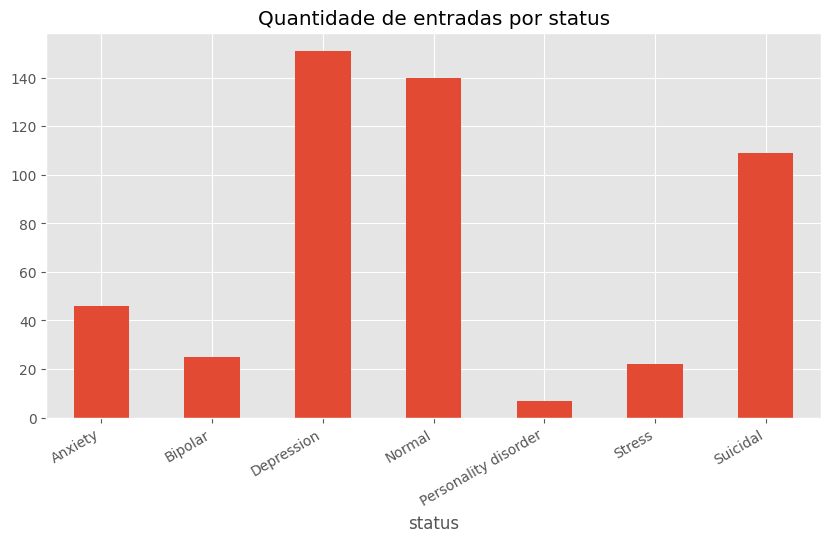

In [6]:
ax = df['status'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Quantidade de entradas por status',
          figsize=(10, 5))
plt.xticks(rotation=30, ha='right')
plt.show()

In [7]:
example = df['statement'][40]
print(example)

I am not going to do anything for the time being. but what is even the fucking point? my body hates me and I am going to die young anyways. I did not even get to experience life before everything was taken from me. before it was ruined. I have never been anything but a useless fucking sextoy. I just want to die more than anything at this point. Ill never be happy. its fucking bullshit. no one fucking helped me no one fucking stopped him. now hes dead without his family fucking knowing about how much of a piece of shit he was and now my entire life is fucking ruined because he decided it was a fucjing marvelous idea to rape a fucking five year old. fuck off I cannot believe this shit fucking happened to me the fuck could I have fucking done to stop him I fucking hate being alive knowing that I cannot take my own fucking revenge I cannot do fucking shit except for a painful fucking death because everyday I am in so much fucking pain and I am never fucking happy anymore. I just want to fu

In [8]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['I', 'am', 'not', 'going', 'to', 'do', 'anything', 'for', 'the', 'time']

In [9]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('I', 'PRP'),
 ('am', 'VBP'),
 ('not', 'RB'),
 ('going', 'VBG'),
 ('to', 'TO'),
 ('do', 'VB'),
 ('anything', 'NN'),
 ('for', 'IN'),
 ('the', 'DT'),
 ('time', 'NN')]

In [10]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  I/PRP
  am/VBP
  not/RB
  going/VBG
  to/TO
  do/VB
  anything/NN
  for/IN
  the/DT
  time/NN
  being/VBG
  ./.
  but/CC
  what/WP
  is/VBZ
  even/RB
  the/DT
  fucking/NN
  point/NN
  ?/.
  my/PRP$
  body/NN
  hates/VBZ
  me/PRP
  and/CC
  I/PRP
  am/VBP
  going/VBG
  to/TO
  die/VB
  young/JJ
  anyways/NNS
  ./.
  I/PRP
  did/VBD
  not/RB
  even/RB
  get/VB
  to/TO
  experience/VB
  life/NN
  before/IN
  everything/NN
  was/VBD
  taken/VBN
  from/IN
  me/PRP
  ./.
  before/IN
  it/PRP
  was/VBD
  ruined/VBN
  ./.
  I/PRP
  have/VBP
  never/RB
  been/VBN
  anything/NN
  but/CC
  a/DT
  useless/JJ
  fucking/NN
  sextoy/NN
  ./.
  I/PRP
  just/RB
  want/VBP
  to/TO
  die/VB
  more/JJR
  than/IN
  anything/NN
  at/IN
  this/DT
  point/NN
  ./.
  (PERSON Ill/NNP)
  never/RB
  be/VB
  happy/JJ
  ./.
  its/PRP$
  fucking/NN
  bullshit/NN
  ./.
  no/DT
  one/NN
  fucking/NN
  helped/VBD
  me/PRP
  no/DT
  one/CD
  fucking/NN
  stopped/VBD
  him/PRP
  ./.
  now/RB
  hes/VBZ
  dead/JJ
  w

# VADER

In [11]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [12]:
sia.polarity_scores('I am so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [13]:
sia.polarity_scores('This is the worst thing ever.')

{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [14]:
sia.polarity_scores(example)

{'neg': 0.415, 'neu': 0.536, 'pos': 0.049, 'compound': -0.9994}

In [15]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    statement = row['statement']
    id = row['id']
    res[id] = sia.polarity_scores(statement)

  0%|          | 0/500 [00:00<?, ?it/s]

In [16]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'id'})
vaders = vaders.merge(df, how='left')

In [17]:
vaders.head()

,id,neg,neu,pos,compound,statement,status
0,47647,0.112,0.779,0.109,-0.7449,life doesn’t feel worth it that’s kind of it? ...,Depression
1,21689,0.330,0.641,0.029,-0.9772,This life sucks and if it were for my religiou...,Depression
2,28246,0.000,1.000,0.000,0.0000,its been 9 months now for our marriage and she...,Stress
3,22363,0.116,0.782,0.102,0.2352,I do not feel particularly sad or anxious or a...,Depression
4,13362,0.000,0.821,0.179,0.6661,I am taking Venlafaxine. it is an SSRI. does n...,Depression


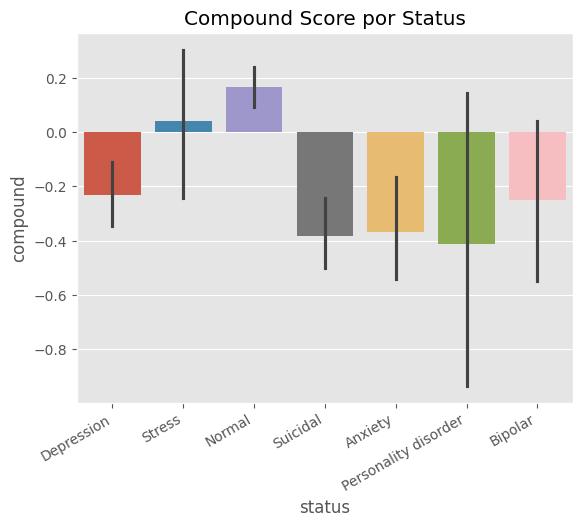

In [18]:
ax = sns.barplot(data=vaders, x='status', y='compound', hue='status')
ax.set_title('Compound Score por Status')
for label in ax.get_xticklabels():
    label.set_rotation(30)
    label.set_ha('right')
plt.show()

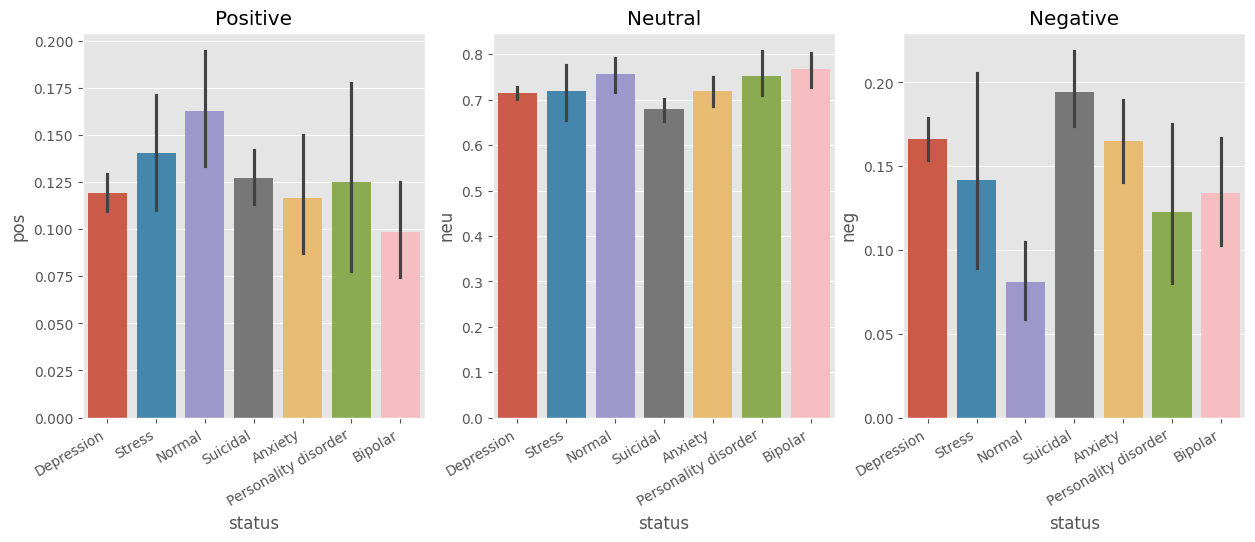

In [19]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
sns.barplot(data=vaders, x='status', y='pos', hue='status', ax=axs[0])
sns.barplot(data=vaders, x='status', y='neu', hue='status', ax=axs[1])
sns.barplot(data=vaders, x='status', y='neg', hue='status', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
for ax in axs:
    for label in ax.get_xticklabels():
        label.set_rotation(30)
        label.set_ha('right')
plt.show()

## Roberta Pretrained Model

In [20]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax
import torch

In [21]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment-latest"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [22]:
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg': float(scores[0]),
    'roberta_neu': float(scores[1]),
    'roberta_pos': float(scores[2]),
}
print(scores_dict)

{'roberta_neg': 0.9589145183563232, 'roberta_neu': 0.03592885285615921, 'roberta_pos': 0.00515667162835598}


In [23]:
def polarity_scores_roberta(text):
    encoded_text = tokenizer(text, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg': float(scores[0]),
        'roberta_neu': float(scores[1]),
        'roberta_pos': float(scores[2]),
    }
    return scores_dict

In [24]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        statement = row['statement']
        id = row['id']
        vader_result = sia.polarity_scores(statement)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value

        roberta_result = polarity_scores_roberta(statement)
        both = {**vader_result_rename, **roberta_result}
        res[id] = both
    except RuntimeError:
        print(f'Falha com a entrada de id {id}')
    except Exception as e:
        print(f'Falha desconhecida com o id {id}: {e}')

  0%|          | 0/500 [00:00<?, ?it/s]

Falha com a entrada de id 24147
Falha com a entrada de id 40390
Falha com a entrada de id 24510
Falha com a entrada de id 20552
Falha com a entrada de id 17878
Falha com a entrada de id 39301
Falha com a entrada de id 48593
Falha com a entrada de id 50832
Falha com a entrada de id 23061
Falha com a entrada de id 51905
Falha com a entrada de id 24141
Falha com a entrada de id 51788
Falha com a entrada de id 7613
Falha com a entrada de id 8960
Falha com a entrada de id 47779
Falha com a entrada de id 13154
Falha com a entrada de id 26426
Falha com a entrada de id 22606
Falha desconhecida com o id 47592: index out of range in self
Falha com a entrada de id 21286
Falha com a entrada de id 25773


In [25]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'id'})
results_df = results_df.merge(df, how='left')

In [26]:
results_df.head()

,id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,statement,status
0,47647,0.112,0.779,0.109,-0.7449,0.903254,0.088806,0.007940,life doesn’t feel worth it that’s kind of it? ...,Depression
1,21689,0.330,0.641,0.029,-0.9772,0.958298,0.037024,0.004678,This life sucks and if it were for my religiou...,Depression
2,28246,0.000,1.000,0.000,0.0000,0.307914,0.604532,0.087554,its been 9 months now for our marriage and she...,Stress
3,22363,0.116,0.782,0.102,0.2352,0.889513,0.101114,0.009373,I do not feel particularly sad or anxious or a...,Depression
4,13362,0.000,0.821,0.179,0.6661,0.364146,0.537663,0.098192,I am taking Venlafaxine. it is an SSRI. does n...,Depression


In [27]:
results_df.columns

Index(['id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'statement', 'status'],
      dtype='object')

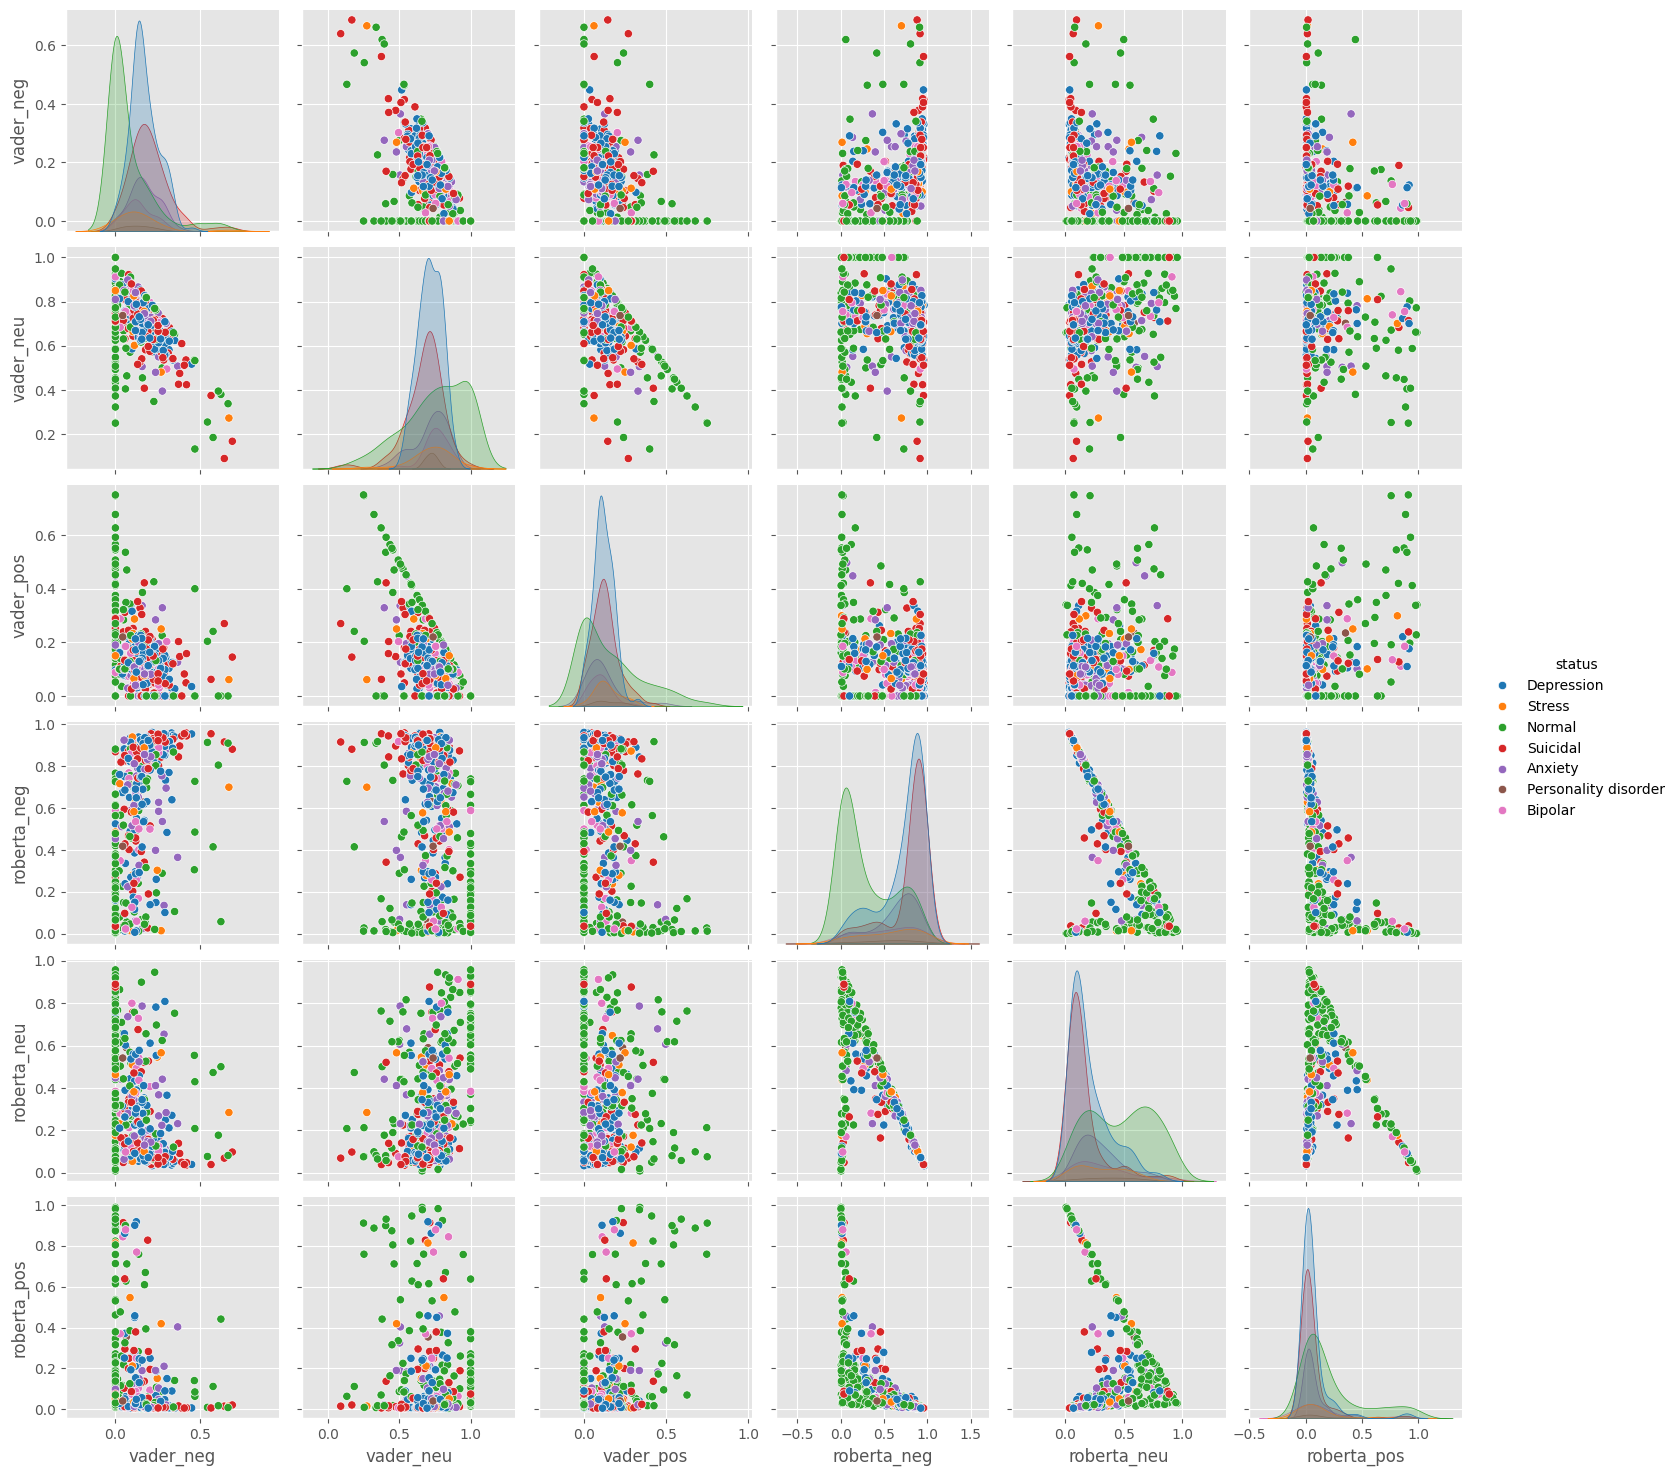

In [28]:
sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
             hue='status',
             palette='tab10')
plt.show()

In [29]:
results_df[results_df['status'] == 'Depression'] \
    .sort_values('roberta_pos', ascending=False)['statement'].values[0]


'posting because this medication ha had an incredible impact for me in a very short time and i think that s worth sharing in case it can help anyone else who suffers from anxiety i wa prescribed propranolol 0mg xr per day a little over one week ago primarily for enhanced physiologic tremor my doctor did also suspect that it would help with some physical symptom of anxiety that i have including elevated hr general muscle tension flushing shortness of breath my anxiety had become so bad over the last year that i have essentially become unable to rock climb which wa previously my favorite activity and stress reliever due to extreme fear shaking freezing up and compulsive checking of equipment well i don t want to get too excited in case thing change a my body acclimates to the drug but so far it really feel like this medication ha changed my life i honestly am starting to feel like myself again in so many way the tension in my shoulder and muscle that ha just become standard for me in the

In [30]:
results_df[results_df['status'] == 'Depression'] \
    .sort_values('vader_pos', ascending=False)['statement'].values[0]

'summer depression sucks the most. there is so much to be enjoyed but no motivation to do so. i can see something like a sunset and logically understand its beauty, but still feel nothing. i feel like potentially joyful moments are happening right in front of me but I am unable to appreciate or recognize them feels nothing'

In [31]:
results_df[results_df['status'] == 'Normal'] \
    .sort_values('roberta_neg', ascending=False)['statement'].values[0]

"KB injection in the ass right? how come it's in the bot and even in the hands? the midwife's rp isn't right"

In [32]:
results_df[results_df['status'] == 'Normal'] \
    .sort_values('vader_neg', ascending=False)['statement'].values[0]

'hate the waiting game she hate uncertainty too'

In [36]:
results_df.to_csv('../data/sentiment_analysis_results.csv', index=False)

## The Transformers Pipeline

In [33]:
from transformers import pipeline

#! FIXME: Não funciona conforme esperado
sent_pipeline = pipeline('sentiment-analysis') 

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use mps:0


In [34]:
sent_pipeline('I love sentiment analysis!')

[{'label': 'POSITIVE', 'score': 0.9981583952903748}]

In [35]:
sent_pipeline('booo')

[{'label': 'POSITIVE', 'score': 0.5689887404441833}]